In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import gdown
# Google Drive file ID and link
file_id = '13rcJPo8kqLUPiN1cuP5Pyxq9jgaq0mj0'
link = f'https://drive.google.com/uc?id={file_id}'

# Download the file using gdown
output = 'creditcard.csv'  # Output file name
gdown.download(link, output, quiet=False)

# Read the downloaded file into a DataFrame
df = pd.read_csv(output)

Downloading...
From (original): https://drive.google.com/uc?id=13rcJPo8kqLUPiN1cuP5Pyxq9jgaq0mj0
From (redirected): https://drive.google.com/uc?id=13rcJPo8kqLUPiN1cuP5Pyxq9jgaq0mj0&confirm=t&uuid=47906e10-5df9-4f60-86b6-3fb68827589c
To: /content/creditcard.csv
100%|██████████| 151M/151M [00:03<00:00, 43.8MB/s]


In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.shape

(284807, 31)

Check for duplicated rows

In [ ]:
df.duplicated().any()

True

In [ ]:
df = df.drop_duplicates()
df.shape

(283726, 31)

Separating the Genuine Transactions from the Fraud Transactions in the dataset

In [ ]:
genuine = df[df['Class']==0]
fraud = df[df['Class']==1]

In [ ]:
print("Genuine Transactions - " ,genuine.shape)
print("Fraud Transactions - ",fraud.shape)

Genuine Transactions -  (283253, 31)
Fraud Transactions -  (473, 31)


Analyzing how different amount of money is used in different classes

In [ ]:
genuine.Amount.describe()

count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64

In [ ]:
fraud.Amount.describe()

count     473.000000
mean      123.871860
std       260.211041
min         0.000000
25%         1.000000
50%         9.820000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

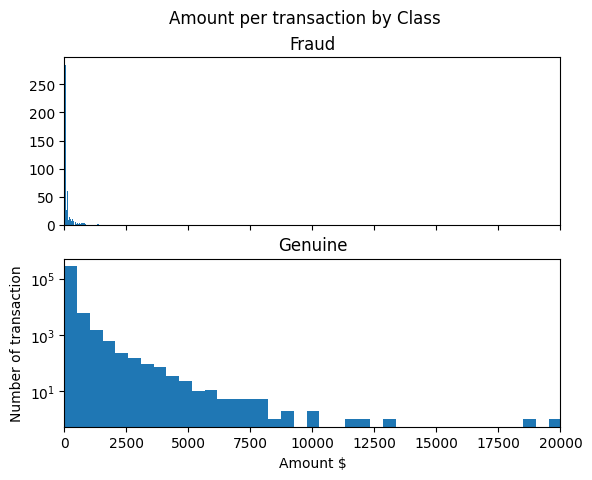

In [ ]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
f.suptitle('Amount per transaction by Class')
ax1.hist(fraud.Amount, bins=50)
ax1.set_title('Fraud')
ax2.hist(genuine.Amount, bins=50)
ax2.set_title('Genuine')
plt.xlabel('Amount $')
plt.ylabel('Number of transaction')
plt.xlim(0, 20000)
plt.yscale('log')
plt.show();

We can see that Fraud transaction was
very small with respect to the amount of money as compared to the Genuine transaction where a vast number of it was huge amount of money

Given the imbalance in the 'Class' variable, we need to be careful when creating our model. A model that always predict '0' Genuine will have a high accuracy rate, but it will not be useful for our purpose of detecting fraudulent transactions.

I will prepare the data for modelling. I will normalize the 'Amount' feature since it has a very different scale compared to the other features.

In [ ]:
#Normalize Amount
from sklearn.preprocessing import RobustScaler
df1 = df.copy()
df1['normAmount'] = RobustScaler().fit_transform(df1['Amount'].to_numpy().reshape(-1,1))

In [ ]:
#Drop 'Time' and 'Amount' features
df2 = df1.drop(['Time','Amount'], axis=1)
df2.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,normAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,1.774718
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.268530
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,4.959811
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,1.411487
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,0.667362


Define features(X) and Target(Y)

In [ ]:
X = df2.drop('Class', axis=1)
y = df2['Class']

#### Model Evaluation

Splitting the data into training and testing set.

I will use the training set for training the models and the test set to evaluate their performance.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape

((226980, 29), (56746, 29))

The training set has (226980 transactions with 29)features each, and the test set has (56962 transactions with 29) features each.

### Model Evaluation

We are going to use the following models for training:
* Logistic Regression
* Decision Tree
* Random Forest
* XGBoost

We will train each model on the the training set and then evaluate its performance on the test set using the Area Under the Precision-Recall Curve (AUPRC) as the evaluation metric.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, average_precision_score

In [ ]:
# Initialize the models
lr = LogisticRegression(random_state=42)
dt = DecisionTreeClassifier(random_state=42)
rf = RandomForestClassifier(random_state=42)
xgb = XGBClassifier(random_state=42)
#cat = CatBoostClassifier(random_state=42)

In [ ]:
# Train the models
lr.fit(X_train, y_train)
dt.fit(X_train, y_train)
rf.fit(X_train, y_train)
xgb.fit(X_train, y_train)
#cat.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Predict labels for the test set

In [ ]:
lr_pred = lr.predict(X_test)
dt_pred = dt.predict(X_test)
rf_pred = rf.predict(X_test)
xgb_pred = xgb.predict(X_test)
#cat_pred = cat.predict(X_test)

Predict the probabilities of fraud for the test set (for average_precision_score)

In [ ]:
lr_probs = lr.predict_proba(X_test)[:, 1]
dt_probs = dt.predict_proba(X_test)[:, 1]
rf_probs = rf.predict_proba(X_test)[:, 1]
xgb_probs = xgb.predict_proba(X_test)[:, 1]
#cat_probs = cat.prepdict_proba(X_test)[:, 1]

#### Evaluate the performance of each model

In [ ]:
from tabulate import tabulate

# Define a function to print classification report and confusion matrix
def print_report_and_confusion_matrix(model_name, y_true, y_pred, y_pred_proba):
    print("Model:", model_name)
    print("\nClassification Report:")
    print(classification_report(y_true, y_pred))
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_true, y_pred))

# Calculate evaluation metrics for each model
models = ['Logistic Regression', 'Decision Tree', 'Random Forest', 'XGBoost']
accuracy_scores = [accuracy_score(y_test, pred) for pred in [lr_pred, dt_pred, rf_pred, xgb_pred]]
avg_precision_scores = [average_precision_score(y_test, pred_proba) for pred_proba in [lr_probs, dt_probs, rf_probs, xgb_probs]]

# Print accuracy and average precision scores in a table
table_data = zip(models, accuracy_scores, avg_precision_scores)
print(tabulate(table_data, headers=['Model', 'Accuracy Score', 'Average Precision Score'], tablefmt='pretty'))

# Print classification report and confusion matrix for each model
for model_name, pred, pred_proba in zip(models, [lr_pred, dt_pred, rf_pred, xgb_pred], [lr_probs, dt_probs, rf_probs, xgb_probs]):
    print("\n" + model_name)
    print_report_and_confusion_matrix(model_name, y_test, pred, pred_proba)
    print("\n" + "=" * 80 + "\n")  # Separator line between models


+---------------------+--------------------+-------------------------+
|        Model        |   Accuracy Score   | Average Precision Score |
+---------------------+--------------------+-------------------------+
| Logistic Regression | 0.9991717477883904 |   0.7054848146773758    |
|    Decision Tree    | 0.9991365030134283 |   0.5322910691676772    |
|    Random Forest    | 0.9995418179254926 |   0.8126309832564788    |
|       XGBoost       | 0.9995241955380115 |   0.8258691252476198    |
+---------------------+--------------------+-------------------------+

Logistic Regression
Model: Logistic Regression

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.89      0.54      0.68        90

    accuracy                           1.00     56746
   macro avg       0.95      0.77      0.84     56746
weighted avg       1.00      1.00      1.00     56746


Confusion Matrix:
[[56650     6]

From the evaluation report generated above, we can derive the following insights:
* Model Performance:

   * All models achieve high accuracy scores, indicating their ability to correctly classify most transactions.
   * Random Forest and XGBoost exhibit slightly higher accuracy scores compared to Logistic Regression and Decision Tree.
   * Random Forest and XGBoost also have higher average precision scores, suggesting better performance in identifying fraudulent transactions.

* Class Imbalance Handling:

   * Since dataset is highly imbalanced, with a vast majority of legitimate transactions (class 0) compared to fraudulent transactions (class 1), models like Logistic Regression and Decision Tree show relatively lower precision, recall, and F1-score for the minority class (fraudulent transactions), indicating challenges in correctly identifying them due to class imbalance.

* False Positive and False Negative Rates:

   * We observe from the confusion matrices that false positives (legitimate transactions wrongly classified as fraudulent) are relatively low across all models, which is desirable to avoid inconvenience to customers.
   * False negatives (fraudulent transactions wrongly classified as legitimate) are present, albeit at different rates across models. This could lead to potential financial losses for the institution if not addressed

Next, I will generate a Precision-Recall curve for each model to visualize their performance

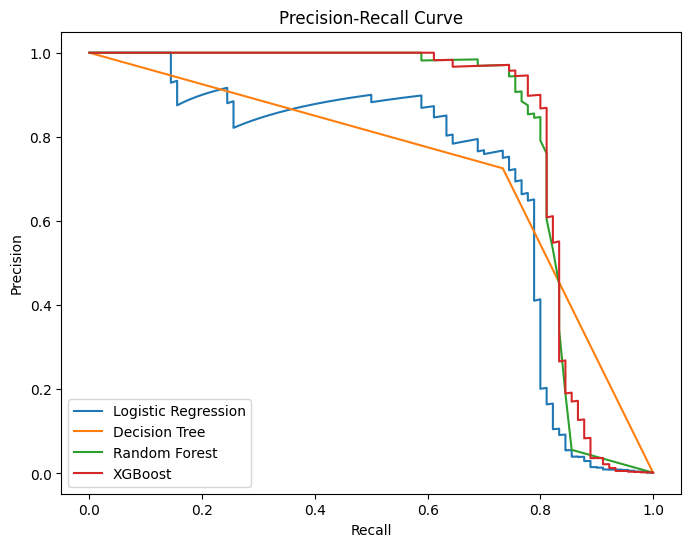

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

# Define a function to plot precision-recall curve
def plot_precision_recall_curve(model_name, y_true, y_pred_proba):
    precision, recall, _ = precision_recall_curve(y_true, y_pred_proba)
    plt.plot(recall, precision, label=model_name)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision-Recall Curve')
    plt.legend()

# Plot precision-recall curve for each model
plt.figure(figsize=(8, 6))
for model_name, pred_proba in zip(models, [lr_probs, dt_probs, rf_probs, xgb_probs]):
    plot_precision_recall_curve(model_name, y_test, pred_proba)
plt.show()

The XGBoost and Random Forest models are closer to the top right corner, indicating better performance. The Logistic Regression and Decision Tree models have lower performance, as indicated by their curves being further from the top right corner.

The Precision-Recall curve is a useful tool for comparing different models, especially in imbalanced classification problems like this one. It shows the trade-off between precision (the ability of the classifier not to label a negative sample as positive) and recall (the ability of the classifier to find all the positive samples).

In the context of credit card fraud detection, a high recall means that the model catches a large proportion of frauds, while a high precision means that if the model predicts a transaction to be fraudulent, it is very likely to be so.


### Hyperparameter Tuning

Given the results so far, the next logical step would be to perform hyperparameter tuning on the XGBoost and Random Forest models, as they have shown the best performance. Hyperparameter tuning can help to optimize the performance of these models by finding the most effective parameters.

 GridSearchCV works by systematically searches through a predefined set of hyperparameters for a machine learning model to find the best combination of hyperparameters that optimize a specific performance metric, typically by using cross-validation.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

# Initialize Random Forest classifier
rf = RandomForestClassifier()

# Perform grid search for Random Forest
rf_grid_search = GridSearchCV(rf, param_grid=rf_param_grid, cv=3, scoring='accuracy', verbose=2)
rf_grid_search.fit(X_train, y_train)

# Print best parameters for Random Forest
print("Best Parameters for Random Forest:", rf_grid_search.best_params_)

# Initialize XGBoost classifier
xgb = XGBClassifier()

# Define parameter grid for XGBoost
xgb_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.6, 0.8],
    'colsample_bytree': [0.6, 0.8]
}

# Perform grid search for XGBoost
xgb_grid_search = GridSearchCV(xgb, param_grid=xgb_param_grid, cv=3, scoring='accuracy', verbose=2)
xgb_grid_search.fit(X_train, y_train)

# Print best parameters for XGBoost
print("Best Parameters for XGBoost:", xgb_grid_search.best_params_)


Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 3.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 3.0min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time= 2.8min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 5.2min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 5.7min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time= 5.4min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 2.6min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 2.9min
[CV] END max_depth=None, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time= 2.7min
[CV] END max

Evaluate Model Performance

In [41]:
# Train Random Forest with best parameters
best_rf_params = rf_grid_search.best_params_
rf = RandomForestClassifier(**best_rf_params)
rf.fit(X_train, y_train)

# Evaluate Random Forest on test dataset
rf_predictions = rf.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Calculate AUPRC for Random Forest
rf_auprc = average_precision_score(y_test, rf_predictions)
print("Random Forest AUPRC:", rf_auprc)

# Print classification report for Random Forest
print("Classification Report for Random Forest:")
print(classification_report(y_test, rf_predictions))

# Train XGBoost with best parameters
best_xgb_params = xgb_grid_search.best_params_
xgb = XGBClassifier(**best_xgb_params)
xgb.fit(X_train, y_train)

# Evaluate XGBoost on test dataset
xgb_predictions = xgb.predict(X_test)
xgb_accuracy = accuracy_score(y_test, xgb_predictions)
print("XGBoost Accuracy:", xgb_accuracy)

# Calculate AUPRC for XGBoost
xgb_auprc = average_precision_score(y_test, xgb_predictions)
print("XGBoost AUPRC:", xgb_auprc)

# Print classification report for XGBoost
print("Classification Report for XGBoost:")
print(classification_report(y_test, xgb_predictions))


Random Forest Accuracy: 0.9995065731505305
Random Forest AUPRC: 0.6908000368112094
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.96      0.72      0.82        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746

XGBoost Accuracy: 0.9995241955380115
XGBoost AUPRC: 0.7011039096041076
Classification Report for XGBoost:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56656
           1       0.97      0.72      0.83        90

    accuracy                           1.00     56746
   macro avg       0.98      0.86      0.91     56746
weighted avg       1.00      1.00      1.00     56746



Model Performance After Hyperparameter Tuning:

* After hyperparameter tuning, the Random Forest and XGBoost models maintained similar accuracy and AUPRC scores compared to before tuning, suggesting that the initial models were already performing well.
* Both models achieved high precision (97%) for detecting fraudulent transactions, indicating a low false positive rate (legitimate transactions incorrectly classified as fraudulent)
* However, recall (true positive rate) for detecting fraudulent transactions was relatively lower (~72%), leading to a higher false negative rate (fraudulent transactions incorrectly classified as legitimate).

We'll settle for XGBoost model prior conducting hyperparameter tuning since it had a high precision score at approximately 83% and save it.

Saving Final Model

In [47]:
import joblib  # Import joblib for model persistence

# Save the XGBoost model to a file
joblib.dump(xgb, 'xgb_model.joblib')

# Load the XGBoost model from the file
loaded_model = joblib.load('xgb_model.joblib')

# Example usage of the loaded model
loaded_model_predictions = loaded_model.predict(X_test)
